In [189]:
from IPython.core.display import HTML

# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [191]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
data[0]['counties']

[{'name': 'Dade', 'population': 12345},
 {'name': 'Broward', 'population': 40000},
 {'name': 'Palm Beach', 'population': 60000}]

In [5]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [6]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [7]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))[:1]

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [9]:
sample_json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Find the 10 countries with most projects
-----------

In [25]:
data=pd.DataFrame(json.load((open('data/world_bank_projects.json')))).countryshortname.value_counts().head(10)
data

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

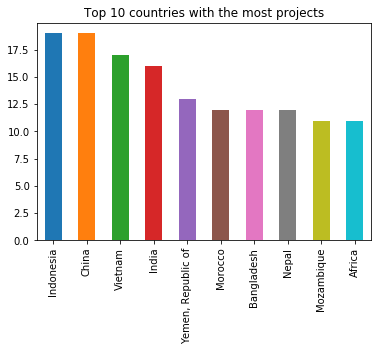

In [26]:
data.plot(kind='bar',title='Top 10 countries with the most projects')
plt.show()

Find the top 10 major project themes 
------------
**(using column 'mjtheme_namecode')**

- You will notice that some entries have only the code and the name is missing. 
Create a dataframe with the missing names filled in.

In [16]:
data=json.load((open('data/world_bank_projects.json')))
data[0]

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

In [27]:
data=json.load((open('data/world_bank_projects.json')))
data=json_normalize(data, 'mjtheme_namecode')#pull out nest in json

In [28]:
comparison=data['name']!='' #filter out missing values in names
comp_data=data[comparison]
codes=comp_data.code.unique()#no missings in code
names=comp_data.name.unique()#some missings in names
print('Lengths of (Codes, Names) :',(len(codes),len(names))) #even list size, this is important for map function

Lengths of (Codes, Names) : (11, 11)


In [29]:
codes_map=dict(zip(codes,names))
codes_map

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [30]:
data.code.map(codes_map).value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: code, dtype: int64

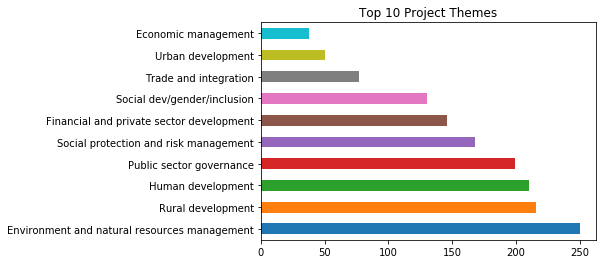

In [31]:
data.code.map(codes_map).value_counts().head(10).plot(kind='barh',title='Top 10 Project Themes')
plt.show()